In [10]:
from DataFormatter import DataFormatter as dFormatter
import MathematicalFunctions
import SarimaxModell

import matplotlib.pyplot as plt
import math
import pandas as pd

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error, mean_absolute_error

DATA = "flat_GoldDaten.csv"

# Get DF Formatted
formatter = dFormatter(DATA)
formatter.setFormattedDataFrame()
formattedData = formatter.getFormattedDataFrame()
print ("An initial analysis of the goldPrices")
formattedData.head()

DataFormatter: Data registered
An initial analysis of the goldPrices


,Price
Date,
1833-01-01,18.93
1833-02-01,18.93
1833-03-01,18.93
1833-04-01,18.93
1833-05-01,18.93


In [11]:
# Separete data
trainingSet = formatter.getDataBetweenDates(formattedData, "2015-1-1", "2019-12-31")
testSet = formatter.getDataBetweenDates(formattedData, "2020-1-1", "2024-12-31")
"""
plt.plot(trainDaten.index, trainDaten["revenue"], color = "black")
plt.plot(testDaten.index, testDaten["revenue"], color = "red")
plt.ylabel('Euros')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split")
plt.show()
"""

'\nplt.plot(trainDaten.index, trainDaten["revenue"], color = "black")\nplt.plot(testDaten.index, testDaten["revenue"], color = "red")\nplt.ylabel(\'Euros\')\nplt.xlabel(\'Date\')\nplt.xticks(rotation=45)\nplt.title("Train/Test split")\nplt.show()\n'

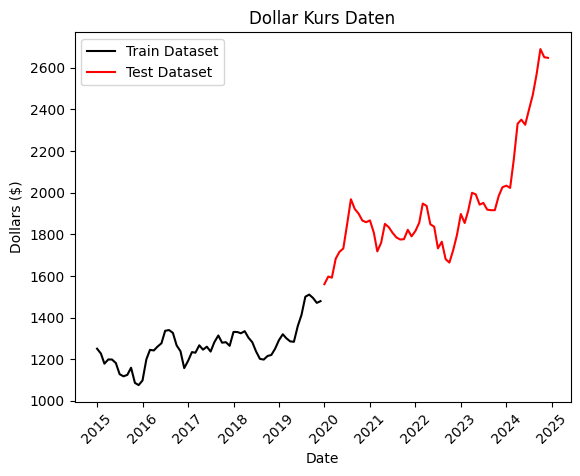

In [12]:
maxGoldValue = int( math.ceil( MathematicalFunctions.getMaxPrice( trainingSet["Price"].max(), testSet["Price"].max() ) ) )
y = range(maxGoldValue)
plt.plot(trainingSet.index, trainingSet["Price"], color = "black", label = "Train Dataset")
plt.plot(testSet.index, testSet["Price"], color = "red", label = "Test Dataset")
plt.ylabel('Dollars (\u0024)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Dollar Kurs Daten")
plt.legend()
plt.show()

/Users/jorge_jaeger/.pyenv/versions/goldPreisPrognose/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jorge_jaeger/.pyenv/versions/goldPreisPrognose/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jorge_jaeger/.pyenv/versions/goldPreisPrognose/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/jorge_jaeger/.pyenv/versions/goldPreisPrognose/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except f

ValueError: x, y, and format string must not be None

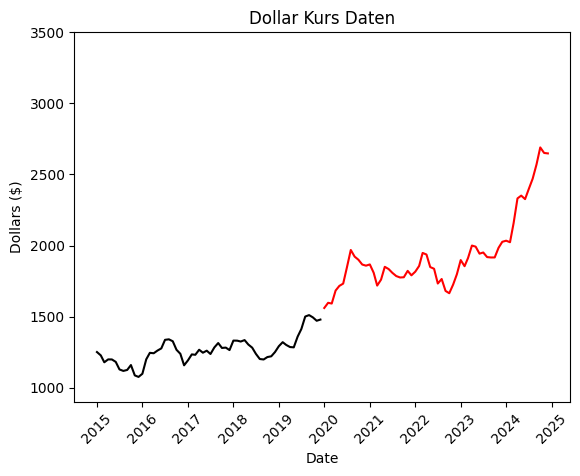

In [ ]:
# Start to train the model: SARIMAX (extension of ARMA to seasonal and trends events. Gold preices)
#y = trainingSet["Price"]

y = trainingSet['Price']

forecastDF = SarimaxModell.simpleSarimaxForecast(trainingSet['Price'], testSet['Price'])

plt.ylabel('Dollars (\u0024)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Dollar Kurs Daten")
plt.ylim(900, 3500)
plt.plot(trainingSet.index, trainingSet["Price"], color = "black", label = "Train Dataset")
plt.plot(testSet.index, testSet["Price"], color = "red", label = "Test Dataset")
plt.plot(forecastDF, color='green', label = 'Predictions')
plt.legend(loc='upper left')
#SarimaxModell.getSeasonalParameterVariationAsVideo(SarimaxModell.seasonalOrderDict['AROrder'] , 3, y, testSet['Price'])

In [ ]:
#VideoProducer.generateVideo(config.ROOT_PLOT_PATH, 'SeasonalVierterParameter')
#print("All Done!!!!")